# Projet 4 Emission : Anticipez les besoins en consommation de bâtiments

## Introduction

L'objectif de ces notebooks est donc de trouver l'algorithme le plus adapté pour répondre à notre problématique. Pour ce faire, nous allons ici tester différents de ces algorithmes pour nous en rendre compte. Nous chercherons également à évaluer l'importance des variables, notamment la variable ENERGYSTARScore.

#### Importation des librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

#### Importation du fichier à étudier

In [2]:
data = pd.read_csv("non_residential_df.csv")

# Visualisation
data

,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,ComplianceStatus_Compliant,ComplianceStatus_Error - Correct Default Data,ComplianceStatus_Missing Data,ComplianceStatus_Non-Compliant,DefaultData_False,DefaultData_True
0,0.096759,1.206764,-0.080040,-0.206828,-1.066654,-0.05759,1.200788,-0.102292,-0.305192,-0.061630,...,0,0,0,0,1,0,0,0,1,0
1,0.096759,1.206764,-0.059896,-0.041603,1.041378,-0.05759,1.048382,-0.051390,0.051252,-0.061391,...,0,0,0,0,1,0,0,0,1,0
2,0.096759,1.206764,-0.044113,-0.211304,0.216496,-0.05759,5.620550,2.816492,4.349551,2.299847,...,0,0,0,0,1,0,0,0,1,0
3,0.096759,1.206764,-0.040168,-0.151889,-1.097206,-0.05759,0.895977,-0.193501,-0.305192,-0.157060,...,0,0,0,0,1,0,0,0,1,0
4,0.098851,1.206764,-0.047851,-0.307753,0.552559,-0.05759,2.115222,0.190859,1.161852,0.026873,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,-10.161182,-1.075933,-1.014131,0.869573,0.858071,-0.05759,-0.475674,-0.358420,-0.305192,-0.329609,...,0,0,0,0,0,1,0,0,0,1
1664,-10.161182,-1.075933,-0.411271,0.410119,1.285788,-0.05759,-0.475674,-0.345954,-0.305192,-0.316566,...,0,0,0,0,1,0,0,0,1,0
1665,-10.161182,1.206764,0.423347,-1.014637,0.369252,-0.05759,-0.475674,-0.355517,-0.305192,-0.326572,...,0,0,0,0,1,0,0,0,1,0
1666,-10.161182,-1.532472,-1.821960,0.349889,0.827520,-0.05759,-0.475674,-0.352342,-0.305192,-0.323250,...,0,0,0,0,1,0,0,0,1,0


#### Vérification : 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Columns: 123 entries, ZipCode to DefaultData_True
dtypes: float64(15), int64(108)
memory usage: 1.6 MB


In [4]:
data.isna().sum()

ZipCode                                          0
CouncilDistrictCode                              0
Latitude                                         0
Longitude                                        0
YearBuilt                                        0
                                                ..
ComplianceStatus_Error - Correct Default Data    0
ComplianceStatus_Missing Data                    0
ComplianceStatus_Non-Compliant                   0
DefaultData_False                                0
DefaultData_True                                 0
Length: 123, dtype: int64

In [5]:
data.describe()

,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,ComplianceStatus_Compliant,ComplianceStatus_Error - Correct Default Data,ComplianceStatus_Missing Data,ComplianceStatus_Non-Compliant,DefaultData_False,DefaultData_True
count,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,...,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000
mean,1.448349e-16,1.533545e-16,5.158890e-14,-3.085834e-13,3.331202e-15,1.033013e-16,5.111818e-17,5.111818e-17,1.703939e-17,-8.519697e-18,...,0.024580,0.002398,0.000600,0.042566,0.928058,0.052758,0.008393,0.010791,0.947242,0.052758
std,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,...,0.154889,0.048926,0.024485,0.201937,0.258470,0.223617,0.091257,0.103350,0.223617,0.223617
min,-1.016118e+01,-1.532472e+00,-2.427313e+00,-3.211389e+00,-1.891537e+00,-3.990300e-01,-6.280792e-01,-3.618146e-01,-3.051921e-01,-3.600818e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.707290e-02,-1.075933e+00,-6.353964e-01,-4.221118e-01,-9.750009e-01,-5.758984e-02,-4.756736e-01,-3.006158e-01,-3.051921e-01,-2.726586e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.759573e-02,-1.628543e-01,-7.713264e-02,-1.111119e-03,9.429111e-02,-5.758984e-02,-3.232680e-01,-2.339708e-01,-3.051921e-01,-2.060817e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,9.895507e-02,1.206764e+00,6.981962e-01,4.571221e-01,8.275199e-01,-5.758984e-02,-1.845679e-02,-4.547242e-02,-3.051921e-01,-3.936627e-02,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.070066e-01,1.206764e+00,2.446658e+00,3.022373e+00,1.621851e+00,3.750082e+01,1.446007e+01,3.095240e+01,1.182414e+01,3.242998e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Comme on peut le voir, nous n'avons aucune valeur nulle, et grâce à la fonction "describe", on peut constater que les données ont bien été normalisées. Nous allons donc pouvoir passer au test des différents algorithmmes.

### Test des différents algorythmes :

In [6]:
# Import des bibliothèques nécessaires

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import time 

#### Random Forest

In [7]:
from sklearn.model_selection import RandomizedSearchCV

# Sélection de la variable cible
X_emissions = data.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)'], axis=1)
y_emissions = data['TotalGHGEmissions']

# Partitionnement des données
X_emissions_train, X_emissions_test, y_emissions_train, y_emissions_test = train_test_split(X_emissions, y_emissions, test_size=0.2, random_state=42)

# Modèle Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Paramètres à tester
param_dist_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Utilisation de RandomizedSearchCV 
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Mesure du temps d'ajustement du modèle pour Random Forest
start_time_rf = time.time()

random_search_rf.fit(X_emissions_train, y_emissions_train)

# Mesure du temps écoulé pour Random Forest
elapsed_time_rf = time.time() - start_time_rf
print("Temps d'ajustement du modèle (Random Forest pour TotalGHGEmissions):", elapsed_time_rf, "secondes")

# Meilleur modèle trouvé par la recherche avec RandomizedSearchCV 
best_model_rf = random_search_rf.best_estimator_

# Mesure des prédictions pour la variable cible avec le meilleur modèle Random Forest
y_emissions_pred_rf = best_model_rf.predict(X_emissions_test)

# Calcul du RMSE
rmse_emissions_rf = mean_squared_error(y_emissions_test, y_emissions_pred_rf, squared=False)
print(f"RMSE pour TotalGHGEmissions avec Random Forest : {rmse_emissions_rf}")

# Calcul du R2
r2_emissions_rf = best_model_rf.score(X_emissions_test, y_emissions_test)
print(f"R2 pour TotalGHGEmissions avec Random Forest : {r2_emissions_rf}")

Temps d'ajustement du modèle (Random Forest pour TotalGHGEmissions): 282.28019881248474 secondes
RMSE pour TotalGHGEmissions avec Random Forest : 0.47124587903157866
R2 pour TotalGHGEmissions avec Random Forest : 0.7839349553194351


### Rappel :

#### Le coefficient de détermination, noté R2, mesure à quel point les valeurs prédites d'un modèle s'ajustent aux valeurs réelles. Il varie de 0 à 1, où 1 indique un ajustement parfait.

#### Le RMSE mesure lui la différence entre les valeurs prédites et les valeurs réelles. Une valeur de 0 pour un RMSE signifierait une prédiction parfaite. Par conséquent plus le RMSE est proche de 0, plus les performances du modèle sont bonnes.


Un RMSE de 0.471 indique donc, que en moyenne, les prédictions du modèle diffèrent d'environ 0.471 unité de la vérité terrain. Ce qui est un assez bon résultats dans notre cas. De plus nous obtenons un R2 (Coefficient de détermination) de 0.783 qui suggère que notre modèle explique moyennement bien la variabilité des émissions de CO2.

#### Elasticnet

In [8]:
# Paramètres à tester pour ElasticNet
param_dist_en = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9],
}

# Modèle ElasticNet
model_emissions_en = ElasticNet(random_state=42)

# Utilisation de RandomizedSearchCV
random_search_en = RandomizedSearchCV(model_emissions_en, param_distributions=param_dist_en, n_iter=9, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Mesure du temps d'ajustement du modèle pour ElasticNet
start_time_en = time.time()

random_search_en.fit(X_emissions_train, y_emissions_train)

# Temps d'ajustement du modèle
elapsed_time_en = time.time() - start_time_en
print("Temps d'ajustement du modèle (ElasticNet pour TotalGHGEmissions):", elapsed_time_en, "secondes")

# Meilleur modèle trouvé par la recherche pour ElasticNet avec RandomizedSearchCV
best_model_en = random_search_en.best_estimator_

# Mesure des prédictions pour la variable cible avec le meilleur modèle ElasticNet
y_emissions_pred_en = best_model_en.predict(X_emissions_test)

# Calcul du RMSE pour ElasticNet
rmse_emissions_en = mean_squared_error(y_emissions_test, y_emissions_pred_en, squared=False)
print(f"RMSE pour TotalGHGEmissions avec ElasticNet : {rmse_emissions_en}")

# Calcul du R2 pour ElasticNet
r2_emissions_en = best_model_en.score(X_emissions_test, y_emissions_test)
print(f"R2 pour TotalGHGEmissions avec ElasticNet : {r2_emissions_en}")

Temps d'ajustement du modèle (ElasticNet pour TotalGHGEmissions): 0.5122778415679932 secondes
RMSE pour TotalGHGEmissions avec ElasticNet : 0.8820698613605367
R2 pour TotalGHGEmissions avec ElasticNet : 0.24300092710303334


Pour cette itération, les résultats semblent être moins satisfaisants. En effet, le RMSE est ici de 0.882 soit bien plus élevé, ce qui indique une moins bonne précision des prédictions du modèle. De plus, le R2 est quant à lui moins élevé, ce qui sous entends que notre modèle explique moins bien la variabilité de la consommation totale d'énergie.

#### Gradient Boosting :

In [9]:
# Paramètres à tester pour le Gradient Boosting
param_dist_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Modèle Gradient Boosting
model_emissions_gb = GradientBoostingRegressor(random_state=42)

# Utilisation de RandomizedSearchCV
random_search_gb = RandomizedSearchCV(model_emissions_gb, param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Mesure du temps d'ajustement du modèle pour le Gradient Boosting
start_time_gb = time.time()

random_search_gb.fit(X_emissions_train, y_emissions_train)

# Temps d'ajustement du modèle
elapsed_time_gb = time.time() - start_time_gb
print("Temps d'ajustement du modèle (Gradient Boosting pour TotalGHGEmissions):", elapsed_time_gb, "secondes")

# Meilleur modèle trouvé par la recherche pour le Gradient Boosting
best_model_gb = random_search_gb.best_estimator_

# Mesure des prédictions pour la variable cible avec le meilleur modèle Gradient Boosting
y_emissions_pred_gb = best_model_gb.predict(X_emissions_test)

# Calcul du RMSE pour le Gradient Boosting
rmse_emissions_gb = mean_squared_error(y_emissions_test, y_emissions_pred_gb, squared=False)
print(f"RMSE pour TotalGHGEmissions avec Gradient Boosting : {rmse_emissions_gb}")

# Calcul du R2 pour le Gradient Boosting
r2_emissions_gb = best_model_gb.score(X_emissions_test, y_emissions_test)
print(f"R2 pour TotalGHGEmissions avec Gradient Boosting : {r2_emissions_gb}")

Temps d'ajustement du modèle (Gradient Boosting pour TotalGHGEmissions): 112.8069965839386 secondes
RMSE pour TotalGHGEmissions avec Gradient Boosting : 0.37846016683060263
R2 pour TotalGHGEmissions avec Gradient Boosting : 0.8606426966341556


Pour le gradient boosting, les résultats sont beaucoup plus satisfaisants avec un RMSE de 0.378, ce qui est considérablement meilleur, et un R2 de 0.860, indiquant un niveau de performance plus élevé. Néanmoins, il est à noter que le temps d'ajustement demeure actuellement assez long.

#### SVM : 

In [10]:
# Paramètres à tester pour SVM
param_dist_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.1, 0.2, 0.5]
}

# Modèle SVM
model_emissions_svr = SVR()

# Utilisation de RandomizedSearchCV
random_search_svr = RandomizedSearchCV(model_emissions_svr, param_distributions=param_dist_svr, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Mesure du temps d'ajustement du modèle pour SVM
start_time_svr = time.time()

random_search_svr.fit(X_emissions_train, y_emissions_train)

# Temps d'ajustement du modèle
elapsed_time_svr = time.time() - start_time_svr
print("Temps d'ajustement du modèle (SVM pour TotalGHGEmissions):", elapsed_time_svr, "secondes")

# Meilleur modèle trouvé par la recherche pour SVM
best_model_svr = random_search_svr.best_estimator_

# Mesure des prédictions pour la variable cible avec le meilleur modèle SVM
y_emissions_pred_svr = best_model_svr.predict(X_emissions_test)

# Calcul du RMSE pour SVM
rmse_emissions_svr = mean_squared_error(y_emissions_test, y_emissions_pred_svr, squared=False)
print(f"RMSE pour TotalGHGEmissions avec SVM : {rmse_emissions_svr}")

# Calcul du R2 pour SVM
r2_emissions_svr = best_model_svr.score(X_emissions_test, y_emissions_test)
print(f"R2 pour TotalGHGEmissions avec SVM : {r2_emissions_svr}")

Temps d'ajustement du modèle (SVM pour TotalGHGEmissions): 8.069079399108887 secondes
RMSE pour TotalGHGEmissions avec SVM : 0.7181777128514368
R2 pour TotalGHGEmissions avec SVM : 0.4981739197780889


Pour le SVR, il affiche un RMSE de 0.718, ce qui représente notre deuxième moins bon résultat. Un R2 de 0.498 est également pas le meilleur résultat, cependant le temps d'ajustement est bien meilleur, rivalisant presque avec l'excellent résultat de l'élastic net.

### Synthèse des résultats

In [11]:
# Création d'un data frame pour  observer tous les résultats

results = {
    'Modèle': ['Random Forest', 'Gradient Boosting', 'SVM', 'Elastic Net'],
    'RMSE': [rmse_emissions_rf, rmse_emissions_gb, rmse_emissions_svr, rmse_emissions_en],
    'R2': [r2_emissions_rf, r2_emissions_gb, r2_emissions_svr, r2_emissions_en],
    'Temps d\'ajustement': [elapsed_time_rf, elapsed_time_gb, elapsed_time_svr, elapsed_time_en]
}

df_results = pd.DataFrame(results)

# Visualisation
df_results

,Modèle,RMSE,R2,Temps d'ajustement
0,Random Forest,0.471246,0.783935,282.280199
1,Gradient Boosting,0.378460,0.860643,112.806997
2,SVM,0.718178,0.498174,8.069079
3,Elastic Net,0.882070,0.243001,0.512278


Comme nous l'avons dit précédemment, notre meilleur algorithme dans ce cas précis semble être le Gradient boosting, mis à part pour le temps d'ajustement.

### Evaluation de l'importance des features :

In [12]:
# Pour se faire nous allons installer SHAP:

#utilisation de SHAP : 
!pip install shap

PermutationExplainer explainer: 335it [01:15,  4.12it/s]                         


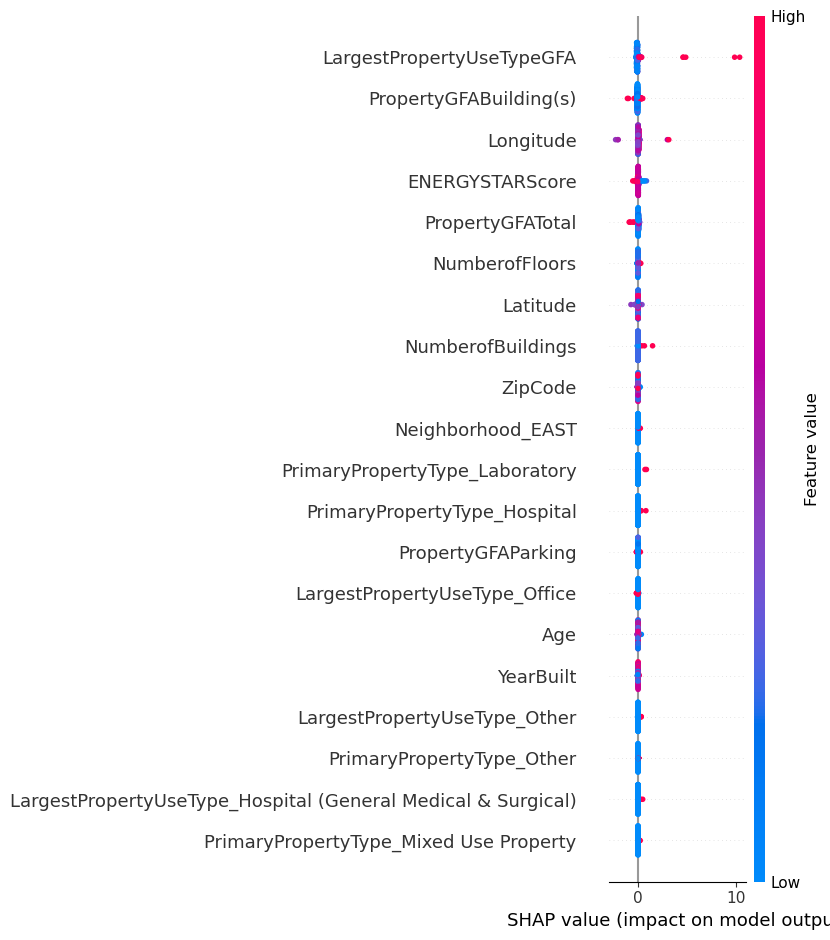

In [13]:
import shap

# Expliquer les prédictions pour le modèle SVM
explainer = shap.Explainer(best_model_gb.predict, X_emissions_train)
shap_values = explainer.shap_values(X_emissions_test)

# Visualisation des contributions des features
shap.summary_plot(shap_values, X_emissions_test)

Comme illustré sur le graphique, les valeurs SHAP sont présentées pour chaque variable dans leur ordre d'importance. Les points rouges représentent des valeurs élevées de la variable, tandis que les points bleus représentent des valeurs basses.

Les valeurs SHAP positives (points à droite) indiquent une contribution positive d'une variable. Par exemple, le modèle semble utiliser la variable LargestPropertyUseTypeGFA pour prédire des émissions élevées.

Cela suggère que le modèle a appris une corrélation positive entre la superficie brute de plancher (SFF) de la plus grande utilisation de la propriété.e sur site avec les émissions de CO2.

On peut également noter que la variable LargestPropertyUseTypeGFA, étant la plus importante, a un impact positif lorsque sa valeur est élevée. En revanche, la variable ropertyGFABuilding(s), deuxième en importance, semble en général avoir un impact négatif lorsque sa valeur est plus élevée.

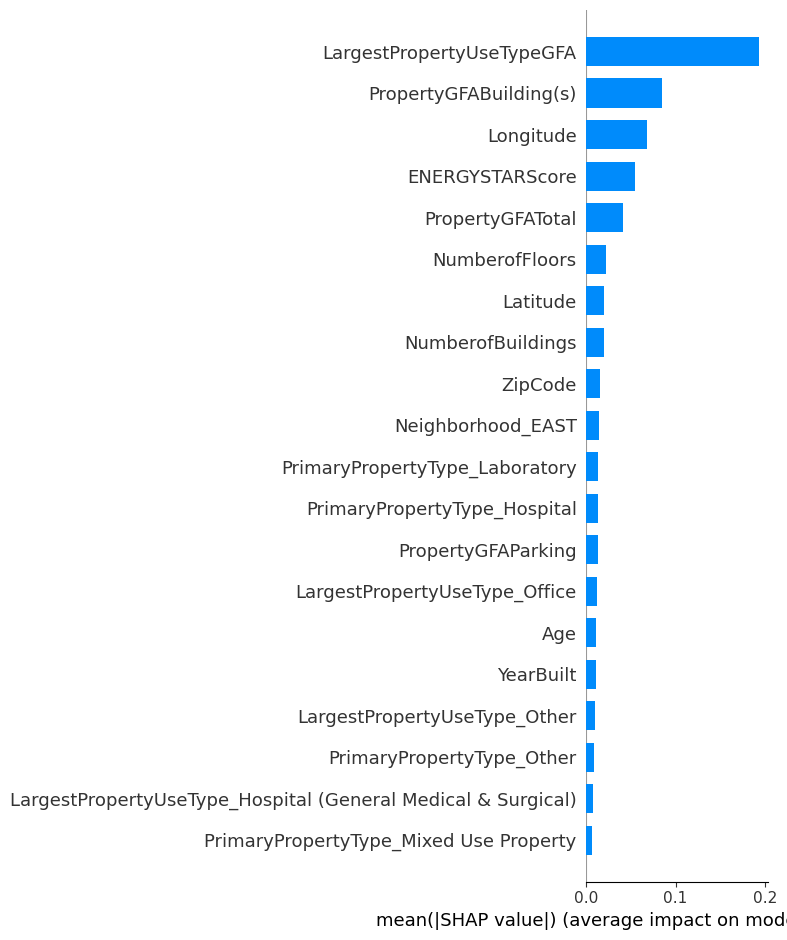

In [14]:
# Nous pouvons également faire une autre visualtisation pour voir clairement l'importance des variables :
# un résumé numérique SHAP
shap.summary_plot(shap_values, X_emissions_test, plot_type="bar")

#### Nous pouvons également voir l’importance des variables plus en détail

In [15]:
# Création d'un explainer en utilisant KernelExplainer
explainer = shap.KernelExplainer(best_model_gb.predict, shap.kmeans(X_emissions_test, 10))

# Calcul des valeurs SHAP pour le premier échantillon dans l'ensemble de test
shap_values = explainer.shap_values(X_emissions_test.iloc[0, :])

# Analyse des valeurs SHAP pour le premier échantillon
feature_names = X_emissions_test.columns
shap_dict = dict(zip(feature_names, shap_values))
shap_dict

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  File "C:\Users\paulm\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.


{'ZipCode': 0.006859214515729137,
 'CouncilDistrictCode': 0.002052646970662148,
 'Latitude': 0.005877019216955661,
 'Longitude': 0.022001271205012527,
 'YearBuilt': 0.0,
 'NumberofBuildings': -0.0023377973672772433,
 'NumberofFloors': -0.007162519006643449,
 'PropertyGFATotal': -0.021883442740904997,
 'PropertyGFAParking': 0.0073993527500010505,
 'PropertyGFABuilding(s)': -0.029026164350066733,
 'LargestPropertyUseTypeGFA': -0.03286360139619447,
 'ENERGYSTARScore': 0.009796035112692699,
 'Age': 0.00619033549213693,
 'BuildingType_Campus': 0.0,
 'BuildingType_NonResidential': 0.0,
 'BuildingType_Nonresidential COS': 0.0,
 'BuildingType_Nonresidential WA': 0.0,
 'BuildingType_SPS-District K-12': 0.0,
 'PrimaryPropertyType_Distribution Center': 0.0,
 'PrimaryPropertyType_Hospital': 0.0,
 'PrimaryPropertyType_Hotel': 0.0,
 'PrimaryPropertyType_K-12 School': 0.0,
 'PrimaryPropertyType_Laboratory': 0.0,
 'PrimaryPropertyType_Large Office': 0.0,
 'PrimaryPropertyType_Low-Rise Multifamily': 0.

Les SHAP Values mesurent l'impact de chaque fonctionnalité sur les prédictions du modèle.

Ces valeurs fournissent des informations précieuses sur la manière dont elles contribue aux prédictions du modèle. Un SHAP Value positif indique une contribution positive à la prédiction, alors qu'au contraier un SHAP Value négatif indique une contribution négative. De plus nous pouvons également noter que les valeurs plus éloignées de 0 montrent une influence plus forte.

### Analyse de l'importance de la variable EnergystarScore pour la prédiction d’émissions

In [16]:
# Sélection de la variable cible
X_emissions_without_energyscore = X_emissions.drop(['ENERGYSTARScore'], axis=1)
y_emissions = data['TotalGHGEmissions']

# Partitionnement des données pour la variable cible
X_emissions_train, X_emissions_test, y_emissions_train, y_emissions_test = train_test_split(X_emissions_without_energyscore, y_emissions, test_size=0.2, random_state=42)

# Paramètres à tester pour le Gradient Boosting
param_dist_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Modèle Gradient Boosting
model_emissions_gb = GradientBoostingRegressor(random_state=42)

# Utilisation de RandomizedSearchCV
random_search_gb = RandomizedSearchCV(model_emissions_gb, param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Mesure du temps d'ajustement du modèle pour le Gradient Boosting
start_time_gb = time.time()

random_search_gb.fit(X_emissions_train, y_emissions_train)

# Temps d'ajustement du modèle
elapsed_time_without_energyscore = time.time() - start_time_gb
print("Temps d'ajustement du modèle (Gradient Boosting pour TotalGHGEmissions):", elapsed_time_without_energyscore, "secondes")

# Meilleur modèle trouvé par la recherche pour le Gradient Boosting
best_model_gb = random_search_gb.best_estimator_

# Mesure des prédictions pour la variable cible avec le meilleur modèle Gradient Boosting
y_emissions_pred_gb = best_model_gb.predict(X_emissions_test)

# Calcul du RMSE pour le Gradient Boosting
rmse_without_energyscore = mean_squared_error(y_emissions_test, y_emissions_pred_gb, squared=False)
print(f"RMSE pour TotalGHGEmissions avec Gradient Boosting : {rmse_without_energyscore}")

# Calcul du R2 pour le Gradient Boosting
r2_without_energyscore = best_model_gb.score(X_emissions_test, y_emissions_test)
print(f"R2 pour TotalGHGEmissions avec Gradient Boosting : {r2_without_energyscore}")

Temps d'ajustement du modèle (Gradient Boosting pour TotalGHGEmissions): 110.5630259513855 secondes
RMSE pour TotalGHGEmissions avec Gradient Boosting : 0.3737020514994679
R2 pour TotalGHGEmissions avec Gradient Boosting : 0.864124753507564


In [20]:
# Création d'un DataFrame pour comparer les modèles

model_comparaison = pd.DataFrame({
    'Modèle': ['Avec ENERGYSTARScore', 'Sans ENERGYSTARScore'],
    'RMSE': [rmse_emissions_gb, rmse_without_energyscore],
    'R2': [r2_emissions_gb, r2_without_energyscore],
    'Temps d\'ajustement (s)': [elapsed_time_gb, elapsed_time_without_energyscore]
})

# Affichage du tableau
model_comparaison

,Modèle,RMSE,R2,Temps d'ajustement (s)
0,Avec ENERGYSTARScore,0.378460,0.860643,112.806997
1,Sans ENERGYSTARScore,0.373702,0.864125,110.563026


Par conséquent, il semble que cette variable ne soit pas indispensable au bon fonctionnement de notre algorithme. De plus, comme nous l'avons constaté lors de notre analyse précédente des SHAP Values pour cette variable, elle était de 0.00979, soit relativement faible. Cela explique ces résultats peu différents. Il semblerait donc que pour éviter le travail fastidieux de notre équipe pour calculer les données de cette variable, nous pourrions nous en passer.

### Conclusion

Pour conclure, nous avons pu tester différents algorithmes à la suite de la préparation de nos données, et nous sommes arrivés à la conclusion suivante : l'algorithme le plus performant selon nos différentes mesures semble être le Gradient Boosting dans les deux cas, même si les résultats sont plus satisfaisants pour la variable 'Emission' que pour la variable 'Energy'.

Nous avons également pu répondre à la question qui nous a été posée sur l'intérêt de l' 'ENERGY STAR Score' pour la prédiction d'émissions. En effet, cette variable ne semble pas nécessaire pour l'obtention des résultats de prédiction. Il pourrait donc être envisageable de la supprimer dans le futur pour éviter les calculs fastidieux.